# 🕰️ ALL ABOUT DURATIONS AND SEGMENTATION IN THE MANUAL SEGMENTATION DATA 🕰️

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import friends_pack

In [3]:
df= pd.read_csv("../output/manual_segmentation_all.tsv", sep='\t')

In [4]:
#add frames to onset and offset time
fps = 29.97
df['onset_frame'] = (df['onset']*fps).round().astype(int)
df['offset_frame'] = (df['offset'] * fps).round().astype(int)
df["season"] = df["episode"].str.extract(r's(\d+)', expand=False).astype(int)

In [5]:
num_segments = df.groupby("episode_full").size().reset_index(name='num_segments')


# NUMBER OF SEGMENTS 🧩 IN EPISODES

/tmp/ipykernel_10927/2401707117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=num_segments, x="episode_full", y="num_segments", palette="viridis")


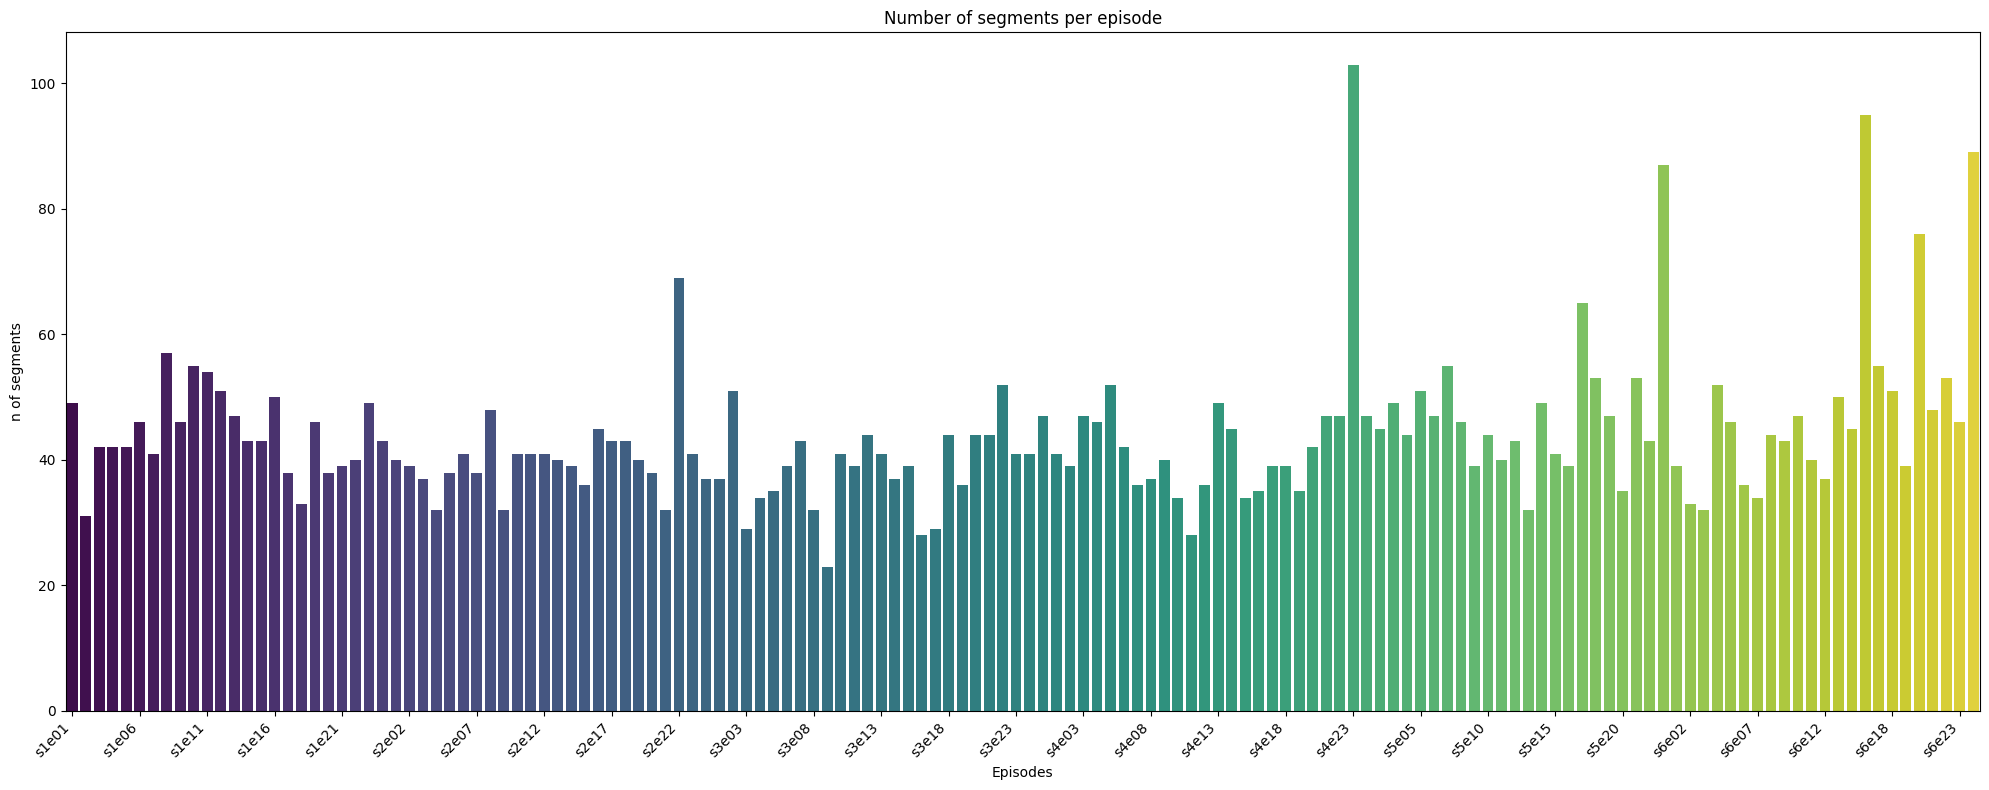

In [6]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=num_segments, x="episode_full", y="num_segments", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Number of segments per episode")
plt.ylabel("n of segments")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()

# AVERAGE DURATION 🕰️ OF SEGMENTS PER EPISODES

/tmp/ipykernel_10927/1605070300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_duration, x="episode_full", y="duration", palette="viridis")


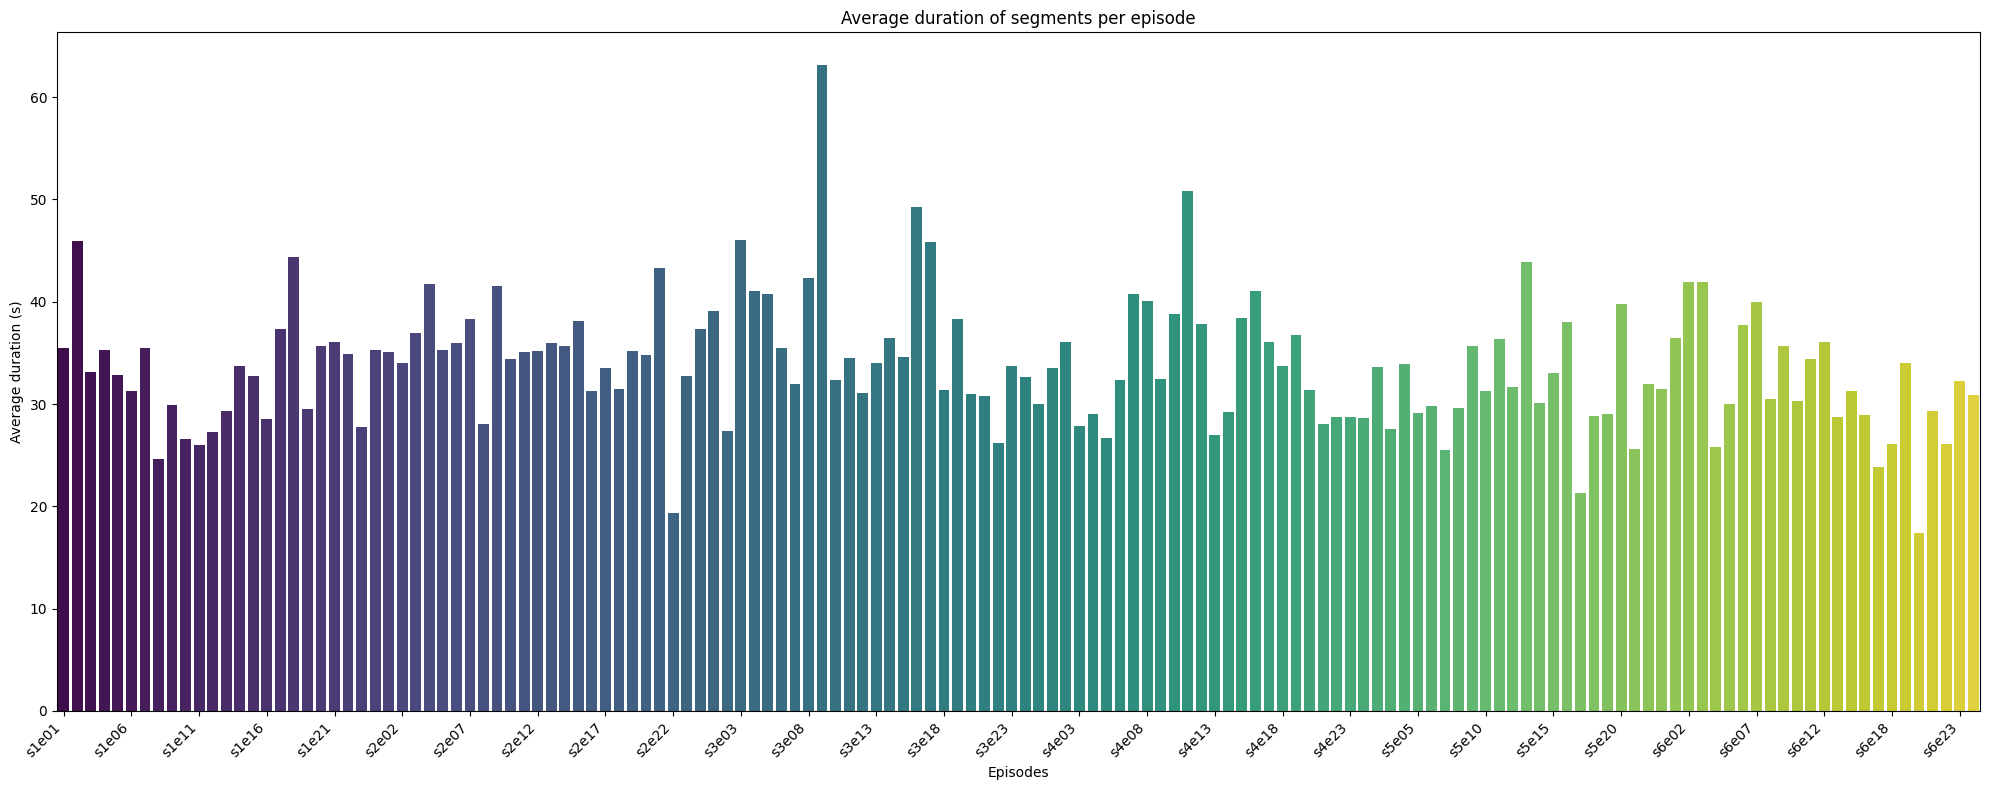

In [7]:
#average duration of scenes per episode for manual segementation
mean_duration = df.groupby("episode_full")["duration"].mean().reset_index()


plt.figure(figsize=(20, 8))
ax = sns.barplot(data=mean_duration, x="episode_full", y="duration", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Average duration of segments per episode")
plt.ylabel("Average duration (s)")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()


# NUMBER OF SEGMENTS 🧩 PER LOCATION 📍🧛‍♂️

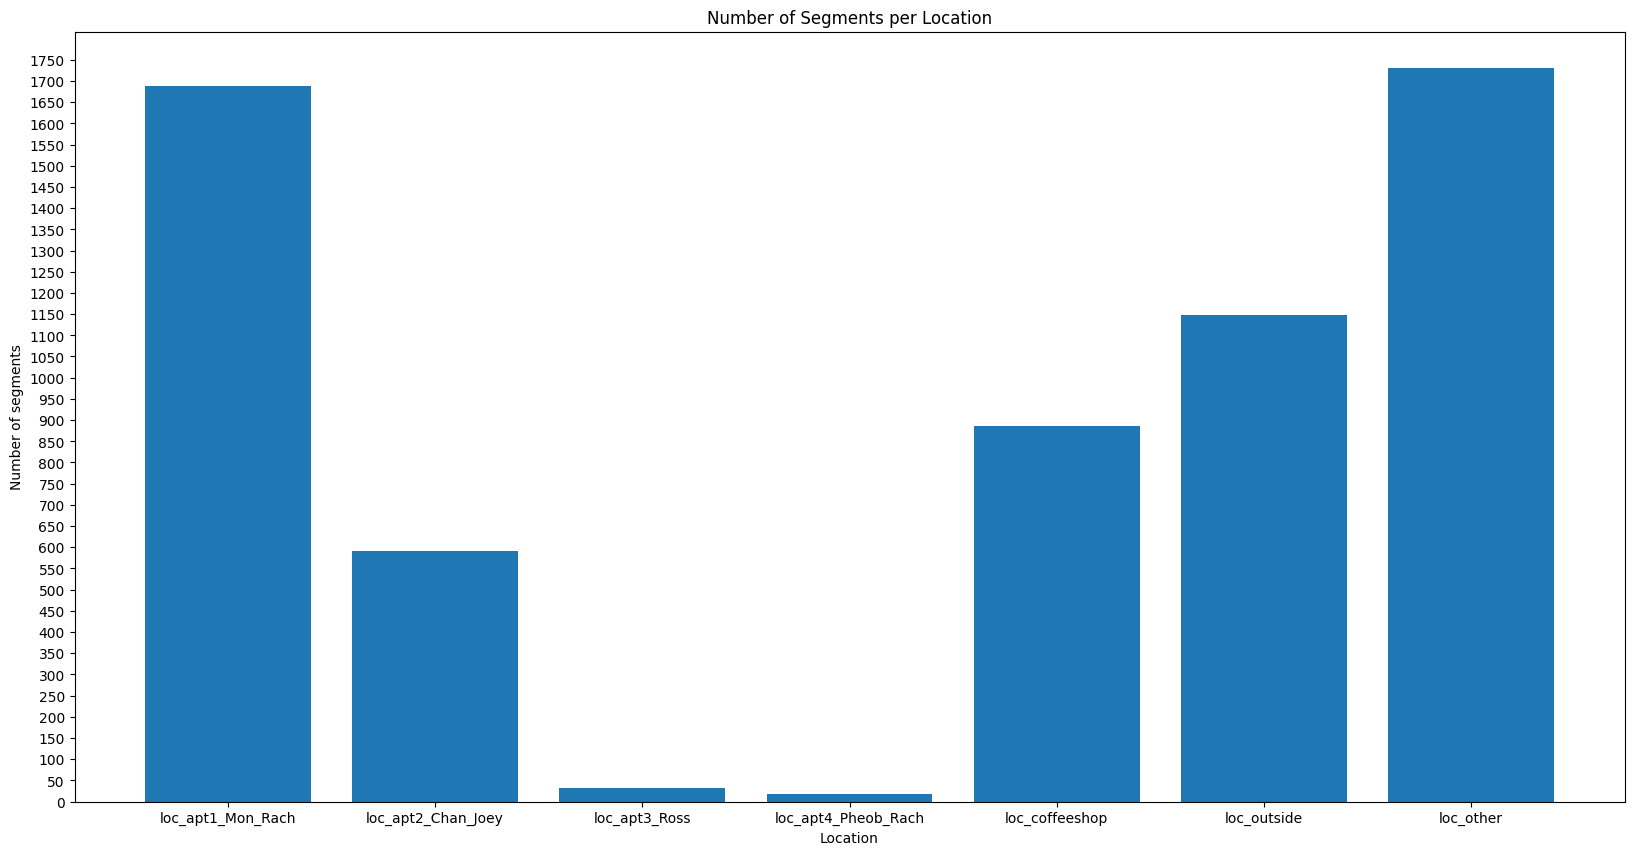

In [9]:
location_columns = ['loc_apt1_Mon_Rach', 'loc_apt2_Chan_Joey', 'loc_apt3_Ross', 'loc_apt4_Pheob_Rach',	'loc_coffeeshop', 'loc_outside', 'loc_other'] 
friends_pack.boolean_True_plotter(df,location_columns, 'Number of Segments per Location', 'Location', 'Number of segments')

# NUMBER OF SEGMENTS 🧩 PER ONBOUND/OFFBOUND 

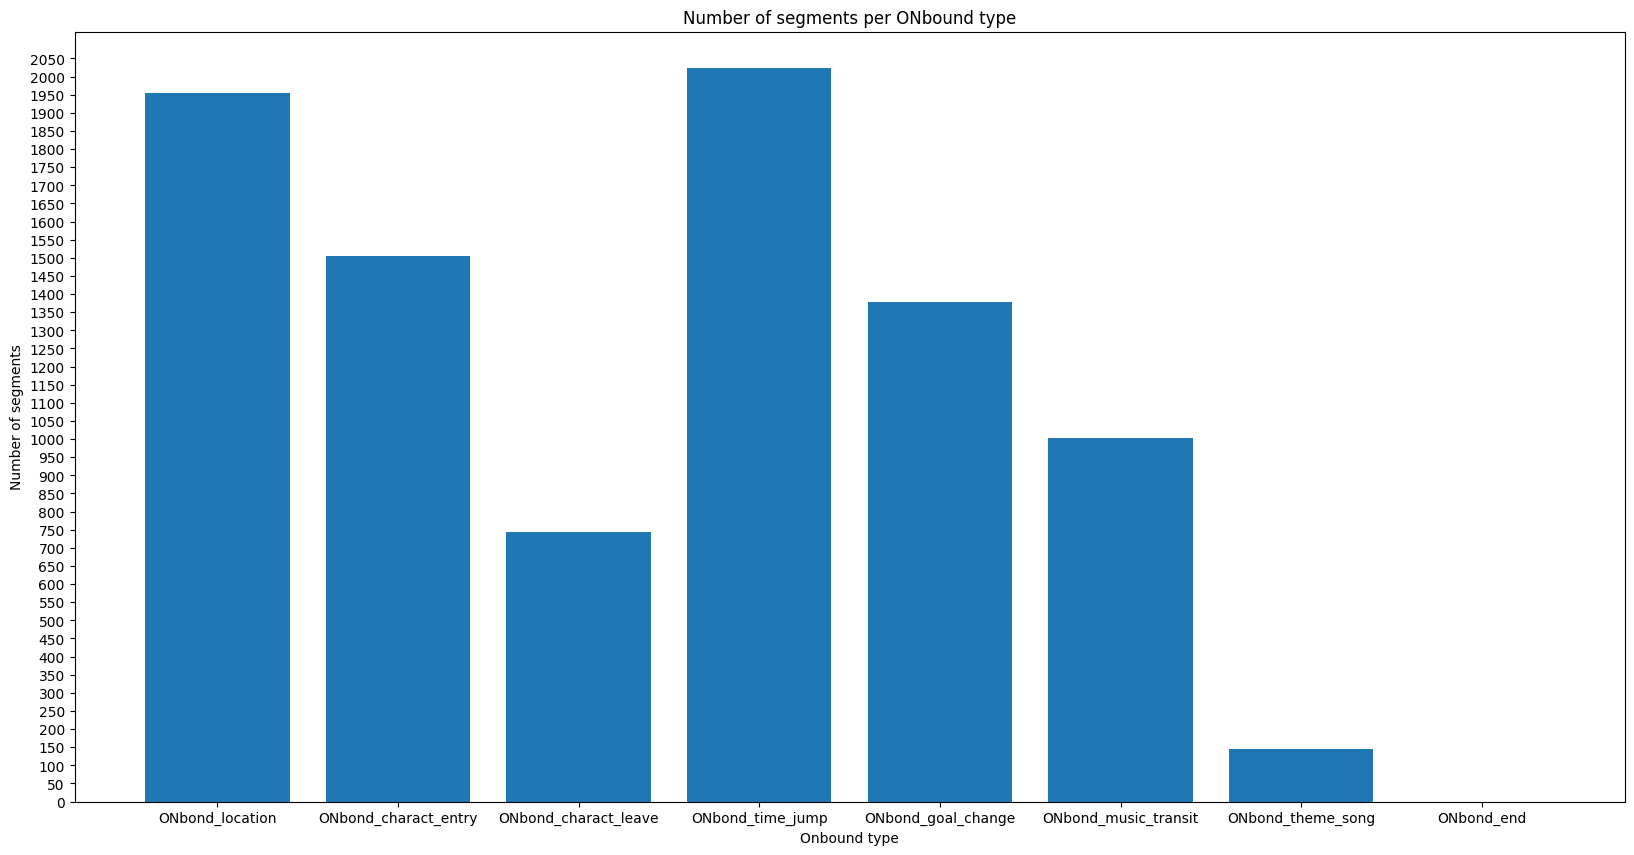

In [10]:
onbound_columns = ['ONbond_location', 'ONbond_charact_entry', 'ONbond_charact_leave', 'ONbond_time_jump', 'ONbond_goal_change', 'ONbond_music_transit',	'ONbond_theme_song','ONbond_end']
friends_pack.boolean_True_plotter(df,onbound_columns, 'Number of segments per ONbound type', 'Onbound type', 'Number of segments')

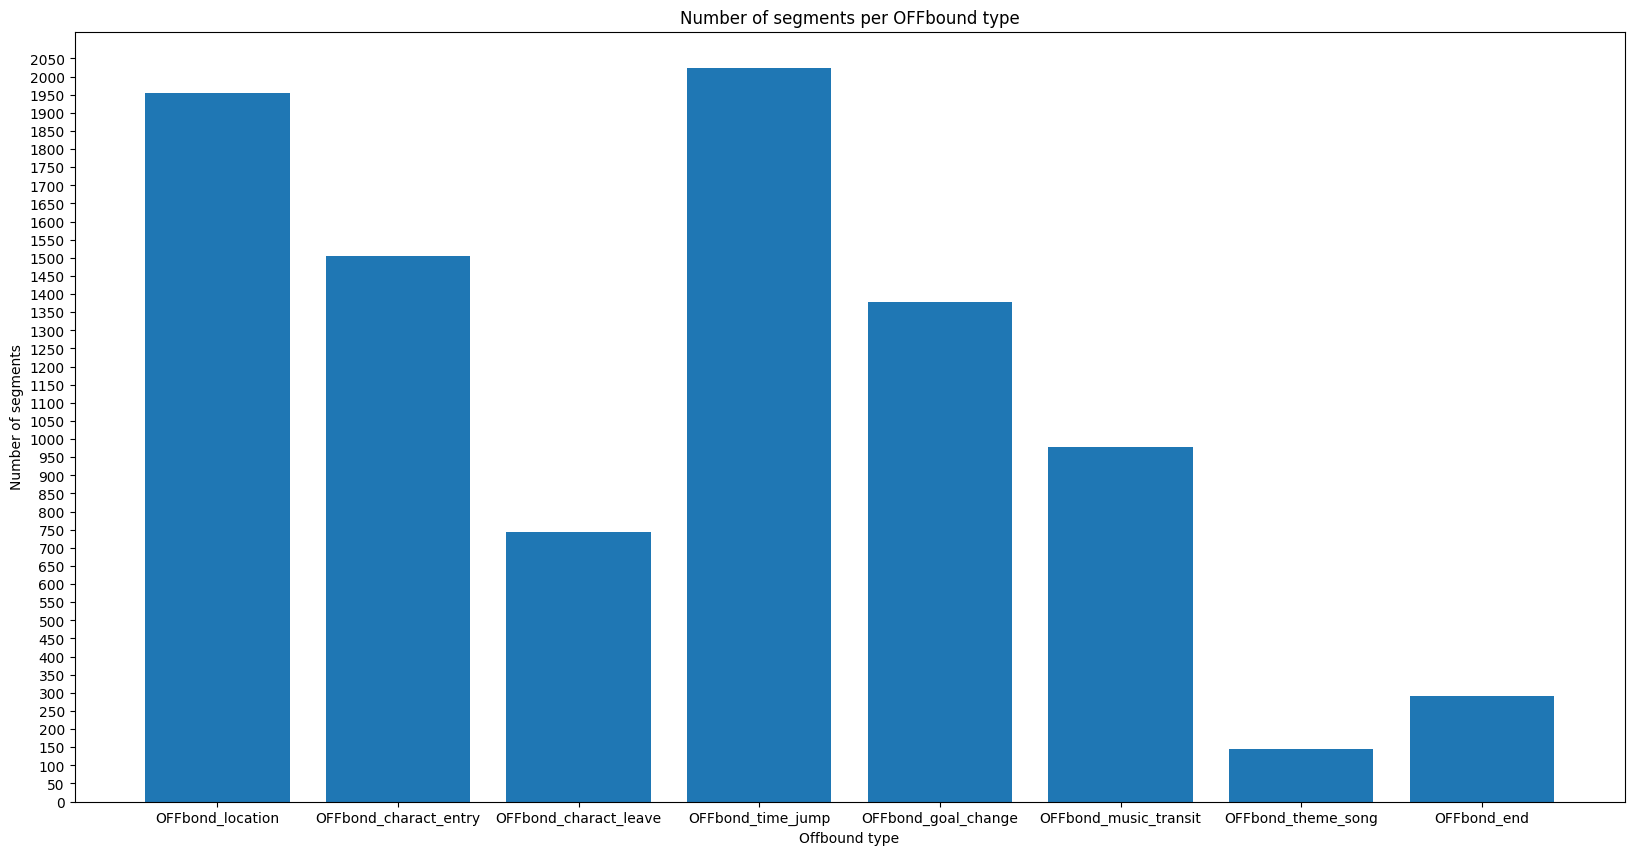

In [11]:
offbound_columns = ['OFFbond_location',	'OFFbond_charact_entry', 'OFFbond_charact_leave',	'OFFbond_time_jump', 'OFFbond_goal_change',	'OFFbond_music_transit',	'OFFbond_theme_song',	'OFFbond_end']
friends_pack.boolean_True_plotter(df,offbound_columns, 'Number of segments per OFFbound type', 'Offbound type', 'Number of segments')

In [25]:
location_cols = [col for col in df.columns if col.startswith('loc_')]
id_vars = ['duration', 'season',] 
df_melted = df.melt(id_vars=['duration', 'season', 'global_segment'],
                    value_vars=location_cols,
                    var_name='location',
                    value_name='is_location')

df_true = df_melted[df_melted['is_location'] == True]



avg_duration = df_true.groupby('location')['duration'].mean().reset_index()




# AVERAGE SEGMENT DURATION AND SEGMENT 🧩 DURATION 🕰️ BY LOCATION 📍🧛‍♂️

/tmp/ipykernel_10927/707888431.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




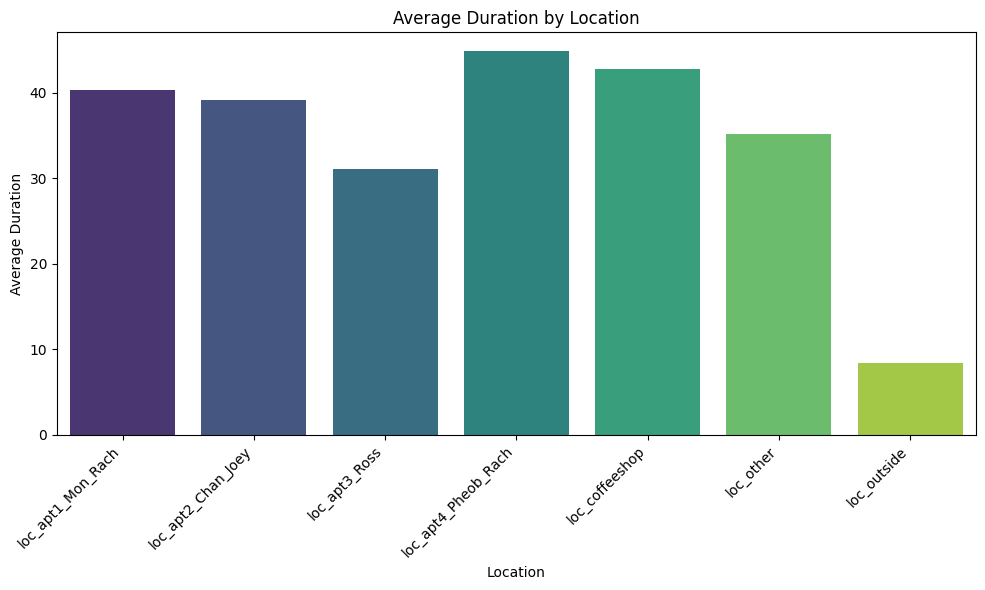

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_duration, x='location', y='duration', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Duration by Location')
plt.ylabel('Average Duration')
plt.xlabel('Location')
plt.tight_layout()
plt.show()

In [28]:

import plotly.graph_objects as go

# Sort seasons
seasons = sorted(df_true['season'].unique())
fig = go.Figure()

# Add one violin plot per season (but only first season is visible by default)
for i, season in enumerate(seasons):
    filtered_df = df_true[df_true['season'] == season]

    fig.add_trace(go.Violin(
        y=filtered_df["duration"],
        x=filtered_df["location"],
        name=f"Season {season}",
        box_visible=True,
        meanline_visible=True,
        points="all",
        hovertext=filtered_df["global_segment"],
        visible=(i == 0),
        customdata=filtered_df[['global_segment', 'duration']].values,
            hovertemplate=(
                "location: %{x}<br>" +
                "Global segment: %{customdata[0]}<br>" +
                "Duration: %{customdata[1]} seconds<br>" +
                "<extra></extra>"  # hides the trace name in the tooltip
    )))

# Create dropdown buttons to toggle seasons
dropdown_buttons = [
    dict(
        label=f"Season {season}",
        method="update",
        args=[
            {"visible": [i == j for j in range(len(seasons))]},
            {"title": f"Segment Duration by Location – Season {season}"}
        ]
    )
    for i, season in enumerate(seasons)
]

# Update layout with dropdown and labels
fig.update_layout(
    updatemenus=[dict(
        buttons=dropdown_buttons,
        active=0,
        x=0.1,
        y=1.2,
        xanchor="left",
        yanchor="top"
    )],
    xaxis_title="Location",
    yaxis_title="Duration (seconds)",
    title=f"Segment Duration by Location – Season {seasons[0]}",
    width=1200,
    height=600
)

fig.show()


In [21]:
ON_cols = [col for col in df.columns if col.startswith('ONbond_')]
id_vars2 = ['duration', 'season',] 
df_melted2 = df.melt(id_vars=['duration', 'season', 'global_segment'],
                    value_vars=ON_cols,
                    var_name='Onbond',
                    value_name='is_Onbond')

df_true2 = df_melted2[df_melted2['is_Onbond'] == True]



# SEGMENT 🧩 DURATION 🕰️ FOR ONBOUND/OFFBOUND TYPE

In [32]:
# Sort seasons
seasons = sorted(df_true2['season'].unique())
fig = go.Figure()

# Add one violin plot per season (but only first season is visible by default)
for i, season in enumerate(seasons):
    filtered_df2 = df_true2[df_true2['season'] == season]

    fig.add_trace(go.Violin(
        y=filtered_df2["duration"],
        x=filtered_df2["Onbond"],
        name=f"Season {season}",
        box_visible=True,
        meanline_visible=True,
        points="all",
        hovertext=filtered_df2["global_segment"],
        visible=(i == 0),
        customdata=filtered_df2[['global_segment', 'duration']].values,
            hovertemplate=(
                "Onbond: %{x}<br>" +
                "Global segment: %{customdata[0]}<br>" +
                "Duration: %{customdata[1]} seconds<br>" +
                "<extra></extra>"  # hides the trace name in the tooltip
    )))

# Create dropdown buttons to toggle seasons
dropdown_buttons = [
    dict(
        label=f"Season {season}",
        method="update",
        args=[
            {"visible": [i == j for j in range(len(seasons))]},
            {"title": f"Segment Duration by Onbound– Season {season}"}
        ]
    )
    for i, season in enumerate(seasons)
]

# Update layout with dropdown and labels
fig.update_layout(
    updatemenus=[dict(
        buttons=dropdown_buttons,
        active=0,
        x=0.1,
        y=1.2,
        xanchor="left",
        yanchor="top"
    )],
    xaxis_title="Onbound",
    yaxis_title="Duration (seconds)",
    title=f"Segment Duration by Onbound – Season {seasons[0]}",
    width=1200,
    height=600
)

fig.show()


# SEGMENT 🧩 DURATION 🕰️ 

In [29]:
import pandas as pd
import plotly.graph_objects as go

# Group your data by season
seasons = sorted(df['season'].unique())
fig = go.Figure()

# Create one trace per season, initially only show the first
for i, season in enumerate(seasons):
    season_df = df[df['season'] == season]
    visible = (i == 0)  # Only first season is visible by default

    fig.add_trace(go.Scatter(
        x=season_df["global_segment"],
        y=season_df["duration"],
        mode="markers",
        name=f"Season {season}",
        visible=visible,
        customdata=season_df[['global_segment', 'duration']].values,
            hovertemplate=(
                "location: %{x}<br>" +
                "Global segment: %{customdata[0]}<br>" +
                "Duration: %{customdata[1]} seconds<br>" +
                "<extra></extra>"  # hides the trace name in the tooltip
    )))

# Create dropdown buttons
dropdown_buttons = [
    dict(
        label=f"Season {season}",
        method="update",
        args=[
            {"visible": [i == j for j in range(len(seasons))]},
            {"title": f"Segment Duration – Season {season}"}
        ]
    )
    for i, season in enumerate(seasons)
]

# Add dropdown to layout
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=0.1,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )],
    xaxis_title="Global Segment",
    yaxis_title="Duration (seconds)",
    title=f"Segment Duration – Season {seasons[0]}",
    width=1000,
    height=600
)


fig.show()